Now we will be discussing Recursice Neural Networks

To motivate this discussion , lets look at how we have progressed in terms of how we have been able to process sentences in machine learning models

---

<h4>Recursive Neural Networks Intro</h4>

The first and simplest way that we always learn about in machine learning is Bag of Words

That means that there is no order associated with the feature vector that represents a sentence

consider the phrases "Toy dog" and "Dog toy"

<img src='extras/33.1.PNG' width ='300'></img>

immediately we can see that these two phrases have totally different meanings and yet a bag of words model treats them exactly the same 

<img src='extras/33.2.PNG' width ='500'></img>

so a machine learning model wouldnot be able to tell the difference between these two , the data itself is fine the information is there , its just that the feature representation is limited

---

Next we looked at Recurrent Neural Networks

We know that these are more powerful because they let us model sentences as sequences of words and so we have the context of all the words in the sentence that came before the current word

<img src='extras/33.3.PNG' width='400'></img>

This is powerful , but is it the most powerful ?

We know that learning long term dependencies is a challenge for RNNs even with modern recurrent units such as the GRU or LSTM

This makes sense since , even for us humans , reading a long sentence takes alot more effort than reading a short sentence

---

but consider how we as humans have learned to parse really long sentences , we dont just read it from start to end do we ?

instead we may read a sentence multiple times , we start to compartmentalise parts of the sentence turning it into a sort of nested structure

In other words a sentence becomes hierarchical or in other words a tree

<img src='extras/33.4.PNG' ></img>

And so it makes sense then , that in order to understand language , we should build a neural network to have the same structure as the sentence it is trying to model

---

<h4>Outline #1</h4>

so lets outline what we will be looking at

<ul>
    <li>How do we represent sentences as trees ?</li>
    <li>what does tje data look like ?</li>
    <li>How do we convert that into a Tree data structure in code ?</li>
    <li>No neural networks yer :|</li>
</ul>

---

<h4>Outline #2</h4>

Next , we are going to look at two different models and two different ways to implement them

So the two different models we are going to look at are the :

<ul>
    <li>Plain recursive net</li>
    <li>RNTN (recursice neural tensor network)</li>
</ul>

Basically the difference between these two is that the plain recursive net uses a linear transformation :

$$Linear : h^{\prime} = f\left(W^Th+b\right)$$

and the RNTN uses a quadratic transformation

$$Quadratic : h^{\prime} = f \left(h^TAh + W^Th + b\right)$$

---

<h4>Outline #3</h4>

We will also look at two different ways to implement these models

The first way is a very naive approach , it involves building a seperate symbolic graph for each sentence in our data

This is of course required because each sentence has a different tree structure

That means each neural network used to represent those sentences must have a different structure , and that means if we have N different datapoints , then we will need N different neural networks (but these neural networks have shared weights)

And of course this is going to totally kill our memory

<img src='extras/33.5.PNG'></img>

---

so the second method we will look at is implementing a recursive neural network as a custom-built recurrent network

How can this be possible ?

We know from our Algorithm studies that we can uniquely convert a tree into a sequence using different tree traversal algorithms

<img src='extras/33.6.PNG' width='300'></img>


this gives us a one-to-one correspondance between each tree and each sequence

of course once we have a sequence we know that RNNs will work , and with RNNs we dont need a unique network to represent each sentence

so we are converting recurssive nets into recurrent nets

<h1>Math</h1>

Now we want to look at a very simple example of how and why we can represent a sentence as a tree

---

<h4>Sentences as Trees</h4>

so the first thing we need to know is what a Parts-of-speech tag is (we already covered this multiple times , nothing complicated)

<ul>
    <li>Noun - a person,place,or a thing</li>
    <li>Verb - action word (walk,run,jump)</li>
    <li>Determiner - think of it as a word that describes a relationship with a noun (the,a,my)<ul><li>so for example if we say 'the dog' , that has a different meaning than 'my dog'</li><li>saying 'my dog' means the dog belongs to me , but saying 'the dog' implies that the dog could belong to anyone</li></ul></li>
</ul>

---

<h4>Parse tree</h4>

ok so why do we need to know Parts-of-speech tags ?

Because thats generally how senetences are split up into trees

These are best demonstrated by an example

so here is the sentence 

$$\text{John hit the ball}$$

and here is its parse tree

<img src='extras/33.7.PNG' width='400'></img>

```
N = Noun
V = Verb
D = Determiner
VP = Verb Phrase
NP = Noun Phrase
```

So , first we can see the Parts-of-speech tag for each individual word

'John' is a Noun , 'hit' is a Verb , 'the' is a Determiner and 'ball' is another Noun

We can see that 'the ball' goes together to form a Noun Phrase

We can see that 'hit' goes with 'the ball' to make up the Verb Phrase

And finally we can see that 'John' goes with 'hit the ball' to make a Sentence

---

<h4>Sentences are hierarchical</h4>

So we can see that language is hierarchical

If we look at very long sentences we can start to see patterns formed

In particular we can see that a Noun Phrase is often followed by a Verb Phrase , and a Verb Phrase is replaceable by a Verb (so we can sort of think of them as the same)

In Computer Science we talk about class hierarchies , so for example we might have a Shape class and from that we can have derived classes like Circle or Square , and we can always trust that if we have a Circle object , it is always also an instance of Shape

<img src='extras/33.8.PNG'></img>

So its kind of like that , so here we have the sentence 

$$\text{the angry bear chased the frightened little squarrel}$$

but if we replace the Verb Phrase with a simple Verb , we would still get a valid sentence , for example $$\text{the angry bear }\underline{ran}$$

We can also replace the Noun Phrase with a simple Noun and that still gives us a Valid sentence , for example $$\underline{Bob}\text{ chased the frightened little squarrel}$$

---

<h4>Sentiment Analysis</h4>

Importantly , for this notebook , we are doing a task called Sentiment Analysis

This means that we want to build a model that tells us how positive or negative something is

for example : 

<ul>
    <li>This movie sucks $\rightarrow$ negative sentiment</li>
    <li>This movie is great : positive sentiment</li>
</ul>

Not only will these sentences be parsed as a tree , but each node in the tree will also have a label to tell the sentiment

<img src='extras/33.9.PNG' width='600'></img>

The reason we want to be able to do this is to handle the problem of negation , which has traditionally , been very difficult for existing NLP models

But with a tree we can see that even if an entire phrase is negative/positive combining it with another phrase can reverse its meaning

for example if the review (in the picture above) was :

$$\text{There are slow and repetitive parts}$$

of course we would just consider that a negative review

But we need to consider the other phrase in the sentence

$$\text{it has just enough spice to keep it interesting}$$

which we could regard as somewhat positive

so that second positive phrase sort of takes over the meaning of the whole sentence , and that probably thank to the word $but$ , which we can see here has neural sentiment

Typically when we use the word but , its in the form of a sentence like "Here is what I thought memontarily BUT this is what I think overall"

so when we see the word but , its usually the second part of the sentence that matters

And representing the sentence as a tree allows us to model that relationship

---

Here is another example :

<img src='extras/33.10.PNG' width='550'></img>

we can see that the word 'humor' has very postitve sentiment , but its also very far down the tree , so the overall sentence has the potential to change its meaning

And indeed we can see that the sentence starts with 

$$\text{This film }\underline{doesn't}$$

which negates the positive part of the sentence

Also notice that , when we are doing sentiment analysis we dont actually care where the parts-of-speech are

That only helped us to parse the tree itself , but once the tree has been parsed we dont need that information any longer

Next , we want to look at how these parse trees are actually represented in our data files , and how we may parse them in code , which will bring us to how we can create recursice neural networks

<h1>Math</h1>

Now we will be taking a closer look at the data we will be working with
 
---

<h4>Recursive Neural Network Data</h4>

so far we have seen two ways of representing sentences

<ol>
    <li>Bag of words</li>
    <li>Sequence of words</li>
</ol>

But the thirds and most powerful way is to think of sentences as trees

Sentences have a dependancy structure , for example think of a very simple sentence , just a (Noun,Verb) 

$$\text{Johny walks}$$

so here 'Johny' is the Noun and 'walks' is the verb

<img src='extras/33.11.PNG' width='250'></img>

---

<h4>Parse Trees</h4>

But we can make longer sentences with the same structure , which make up a Noun Phrase and a Verb Phrase

<img src='extras/33.12.PNG' width='400'></img>

so for example

$$\text{Big John walks quickly}$$

so here 'Big John' is the Noun Phrase and 'walks quickly' is the verb phrase

'Big John' can the be split up into its constituent parts , same for 'walks quickly'

Now we have a tree :)

---

Now just as a sidenote , how are these trees built ?

Unsurprisingly , this is also a machine learning problem

we wont discuss how to do it ourselves , we will just use the results

As a more philosphical thought , can we imagine an entire system of neural networks all performing different tasks such that the end result is something actionable in the real world

so for example , if we are building a brain , the language processing system would be just a small part 

But we might have a NN to do parts-of-speech tagging another NN to do named-entity recognition and another NN to parse sentences into trees , and thats just a small part of an entire brain

An even more challenging problem might be to figure out , what is a general architecture we can use so that we dont even have to tell the system to learn these things

In other words , a network of neural networks where each NN can figure out what it should do on its own and be useful for the overall system in a global manner

---

There are a few ways to represent sentences as parse trees

In general , a node in a tree can have any number of children such as this one

<img src='extras/33.13.PNG' ></img>

for us we will be working with binary trees , that means each node will have up to 2 children

the binary trees we will be using are such that , if a node has children it always has two children

so there will be no situations where a node only has 1 child

---

<h4>The task</h4>

One of the tasks we can do using RNNs is next word prediction , so we are able to build a language model by maximising $p(x(t)|x(t-1),\ldots,x(0))$

now that we have trees , is there such a thing as next ?

The answer is NO , because trees are not a sequence , they are hierarchical

Instead we are going to do Sentiment Analysis

---

<h4>Sentiment Analysis</h4>

Recall that we tried to do sentiment analysis using bag of words as input , the disadvantage to this is that it cant handle negation

if we have one-hot-encoded words adding a 'not' or 'isnt' to the input vector will give us another vector very close to the original vector , so its very hard for any ML model that uses BoW to handle negation

Whats interesting is that Recursive Neural Networks finally solve this problem

Research on sentiment Analysis hot about 80% accuracy at best , until recursive neural networks came along , now we can acheive about 85-90% accuracy

so why do recursive neural networks work so well ?

well , if we have negation then its very easy to just reverse whatever is in the phrase that its negating 

because the parse tree is structured to identify these dependancies , the NN can use them to do negation

<img src='extras/33.14.PNG' width='200'></img>

---

Now what does this suggest ?

It means that we are going to have a label for every node of the tree

so lets go back to the sentence tree which we talked about a little bit

All we know so far is that it is a binary tree and each node has 0 or 2 children , so lets add to this

To be able to understand negation we will have labels at each node

one more fact we need to know , that we can figure out easily ourselves just by looking at the data , is that only the leaves of the tree represent words

Any inner node represent a phrase made up of words that are its descendants

---

So now that we know everything about the structure of the tree , what does the data actually look like ?

first we can get the data from here <a href='https://nlp.stanford.edu/sentiment/'>here</a>

we want to download the file : trainDevTestTrees_PTB.zip , its just a bunch of movie reviews

we might be wondering , how did the researchers actually get all this labeled data ?

well they used the service called Amazon Mechanical Turk , where people do random tasks for money

so they where all given very short phrases , down to the word level , and asked to rate them from 1-5 (5 being highest sentiment , 1 being lowest sentiment and 3 being neutral)

In our data of course , these are labeled 0-4

---

<h4>Data format</h4>

because the data needs to be represented as text ,the researchers used perenthesis ,$()$, to seperate each node

so for example : $\text{Great movie}$

would be represented by this text : $\text{(5(5 Great)(3 movie))}$

and it would be a height 1 binary tree that represents the sentence $\text{Great movie}$


<h1>Math</h1>

Next , we are going to talk about the architecture of Recursive Neural Networks

We are going to talk about how we can create a Recursice Neural Network both for binary trees , and for trees with any number of children

sometimes people refer to Recursive Neural Networks as RNNs , but the nit becomes to easy to confuse with Recurrent Neural Networks 

An unfortunate coincidence , however we will see later why it might be appropriate :)

We are going to sometimes refer to them as "Tree Neural Networks" , TNNs because thats what they are

---

<h4>TNNs</h4>

The easiest way to understand them is to think about the parse tree of a sentence

because we are using binary trees in our data , we will discuss binary trees first

our Recursive Neural Network will essentially have the very same structure as the parse tree

<img src='extras/33.15.PNG' width = '400'></img>

The question is , where do the weights go ? how do we compute the output ?

Because the structure is recursive , we can only define a node's value by its children

when we look at its children , those are also nodes , so those nodes can only be defined by their own children and so on

because of this we only need two weights , one to the left to tell us how the left child connects to the current node , and one for the right to tell us how the right child connects to the current node

notice how there is only one bias term (of course having two bias terms is redundant)

so here is how we calculate the value at the hidden node $h_1$

$$x_1 = w_1 = \text{word embedding for }w_1$$

$$h_1 = f\left(W_{\text{left}}x_1 + W_{\text{right}}x_2 + b\right)$$

Now lets calculate the vakue at the root

$$h_{\text{root}} = f\left(W_{\text{left}}h_1 + W_{\text{right}}x_3 + b\right)$$

we can see that it depends on $h_1$ on its left and $w_3$ on its right

the question we might have next is , what is the size of these weights

well remember that the structure is recursive , so that at any node its children might be words or its children might be other nodes

But the weights have to fit with both , therefore the weights must all be the same size and its input size must match its output size

in other words , if our embedding is of size D , then all the $W$s must be of size DxD and all the biases must be of size $D$

note that the activation function $f$ can be any of the activation functions we use $relu,tanh,etc...$

---

so whats next

<img src='extras/33.16.PNG' width='400'></img>

well , if we are doing a task like sentiment analysis and we have 5 classes (0-4) or 2 classes (+ve/-ve) depending on how we frame the problem , how do we get an output of size 5 or size 2 ?

remember that any node can have a label , so we must be able to calculate $p(y \vert h)$ for any $h$ as an inner node , root node or a single word

to do that, all we need to do is multiply that node's value by the output weight $W_o$ add the output bias $b_o$ and softmax it as usual

$$p(y \vert h) = softmax(W_oh+b_o)$$

by doing softmax , we can have any number of classes , 2 or 5 would be treated exactly the same

note that even though the inner nodes are labeled , we dont necessarily have to use them during training

in fact , we will write code for both and then we will see if there is a difference in the results

---

Now that we fully defined what a binary recursive neural network would look like , what about a recursive neural network with any number of children ?

<img src='extras/33.17.PNG' width='250'></img>

we can see that by summing over each child we naturally extend the definition if the binary relationship

$$h = f \left(\sum_i W\left(rel\left(h,i\right)\right)x_i + b\right)$$

we might wonder how do we even get a tree that is not binary in the first place ?

well , stanford NLP tools actually give us a way to generate our own parse trees from arbitary text , the disadvantage of doing that however is that we wont have a labeled dataset

now whats interesting is that , they dont have a tool which is as easy to use to get binary trees (which is why we are very lucky that they did the work of generating the data for us)

note : they have written some code (in java) to produce binary trees , but still the data will be unlabeled

In any case the number of parent-child relationships is obviously limited , so lets call that limit $R$

so there are $R$ possible different dependency relations

because of this we can make a big $W$ matrix that contains all the R different DxD matricies and multiply the input by the appropriate relation weight to get the appropriate value

we can think of the binary tree as a simple case of this , where there are only two types of relation left and right , R = 2

note : so here W is of size RxDxD

note : rel(h,i) returns a number from 1 ... R (0 to R-1 in code) telling us the type of relationship , these are given by Stanford NLP parser

<h1>Code</h1>

In [1]:
# lets remember our options
# we have two models , Plain Recursive nets (linear) and RNTNs (quadratic)
# and we have two ways to implement each , Recursion (trees) or custom-built RNN (sequences)
# so out of the 4 option we will implement the following
# Plain Recursive Nets + Recursion (what we now so far)
# RNTNs + sequences (will look at later)
# lets start coding Plain Recursive Nets + Recursion
# note that since tensorflow 2.0 supports eager execution
# we dont have to worry about graphs being compiled and problems that follow (code becoming slow)
# and our models will be running quite fast
# but we will still be looking at the sequences solution to see if its worth it
# otherwise the RNTN will be just a small change to this code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.utils import shuffle
from datetime import datetime

In [3]:
# lets define a class of tree nodes
class node:
    def __init__(self):
        self.right = None
        self.left = None
        self.label = None 
        self.word = ''
        # eases parsing
        self.parent = None

In [4]:
# next lets load in the data
train_trees_text = []
for line in open('datasets/trees/train.txt'):
    train_trees_text.append(line.rstrip())
    
test_trees_text = []
for line in open('datasets/trees/test.txt'):
    test_trees_text.append(line.rstrip())

In [5]:
# lets create a function to parse teext to a tree
def create_tree(text):    
    # first create root node
    root = node()
    # we also want to keep track of the words we saw
    words = []
    for i,w in enumerate(text):
        if w == ' ':
            continue

        if w == '(':
            # so we need to create a new node
            child = node()
            if root.left is None:
                root.left = child
            else:
                root.right = child
            child.parent = root
            # then let l_child continue
            root = child

        elif w != ')':
            # we have a label or a word
            # lets peak ahead to see if the next symbol is a character or a ' '
            if text[i+1] == ' ': 
                # so we have a label
                root.label = int(w)
            else:
                # so its a character of the word
                root.word += w.lower()
        else : # w is )
            if root.word != '':
                words.append(root.word)
            root = root.parent

    # our root is actually the left child of the root
    root = root.left
    return root,words

In [6]:
# now lets convert text to trees
vocab = []
train_trees = []
for text in train_trees_text:
    tree,words = create_tree(text)
    train_trees.append(tree)
    vocab += words

test_trees = []
# now again for test data
for text in test_trees_text:
    tree,words = create_tree(text)
    test_trees.append(tree)
    vocab += words
    
vocab = list(set(vocab))
V = len(vocab)

In [7]:
# lets also create word2idx dict
word2idx = {k:v for k,v in zip(vocab,range(V))}

In [8]:
K = 5
D = 10
is_binary = True # whether or not to do binary classification

In [9]:
# we will change our problem to binary classification
# so rating 0,1 become negative sentiment : 0
# 2 is neutral sentiment : -1 , these will be filtered out 
# 3,4 become positive sentiment : 1

def to_binary(tree):
    if tree == None:
        return
    if tree.label<2:
        tree.label = 0
    elif tree.label == 2:
        tree.label = -1
    else:
        tree.label = 1
    to_binary(tree.left)
    to_binary(tree.right)
    return tree
    
if is_binary:
    K = 2
    for tree in train_trees:
        to_binary(tree)
    for tree in test_trees:
        to_binary(tree)

In [10]:
# filter out trees whose label (that of root) is neutral (2 --> -1)

train_trees = [tree for tree in train_trees if tree.label != -1]
test_trees = [tree for tree in test_trees if tree.label != -1]

In [11]:
# now we are ready to make our model
# we will implement two models
# one that takes advantage of the fact that each node knows its parent
# thus we get an iterative solution
# the other is the recurssive solution
class TNNI(Model): # TNN Iterative
    def __init__(self,V,D,K):
        super(TNNI, self).__init__()
        self.V = V
        self.D = D
        self.K = K
        We = np.random.randn(V, D)/np.sqrt(V+D)
        W1 = np.random.randn(D, D)/np.sqrt(D+D)
        W2 = np.random.randn(D, D)/np.sqrt(D+D)
        Wo = np.random.randn(D, K)/np.sqrt(D+K)
        bo = np.zeros(K)
        bh = np.zeros(D)

        self.We = tf.Variable(We.astype(np.float32))
        self.W1 = tf.Variable(W1.astype(np.float32))
        self.W2 = tf.Variable(W2.astype(np.float32))
        self.Wo = tf.Variable(Wo.astype(np.float32))
        self.bo = tf.Variable(bo.astype(np.float32))
        self.bh = tf.Variable(bh.astype(np.float32))
    
    # takes in lost of roots
    # return accuracy
    def score(self,trees):
        correct = 0
        for tree in trees:
            t,p = self(tree)
            if t==p:
                correct+=1
        return correct/len(trees)

    # takes root , returns logits and targets
    def call(self, root,pred=True):
        # instead of taking the recursive approach
        # we can make use of the fact that each node knows its parent
        # and traverse the tree bottom up
        # first we get all the leaf nodes
        children = []
        parents = []
        children_h = []
        parents_h = []

        # so this gets all the leaf nodes in children in postorder
        self.postorder(root,children)

        # next we traverse the tree bottom up
        # we consider nodes in pair
        # if they have the same parent , thats great !
        # if not , then the node in to the left makes its way to the parents
        # and the node to the right will be checked next iteration to the node to its right
        # that until we reach the root
        # we do so while getting the logits
        # this simulates a Reverse Breadth first traversal
        # first get word vectors of leaves
        children_h = [tf.nn.embedding_lookup(self.We,word2idx[node.word]) for node in children]
        # next we get the logits
        logits = [tf.matmul(tf.experimental.numpy.atleast_2d(leaf_vec),self.Wo)+self.bo for leaf_vec in children_h]
        targets = [leaf.label for leaf in children]
        while len(children) !=1 : # so we loop till we reach one node, that is the root
            i=0
            while i<len(children):

                left = children[i]
                if i == len(children)-1: # no right , left is the last child
                    parents.append(left)
                    left_h = children_h[i]
                    parents_h.append(left_h)
                    i+=1
                    continue

                right = children[i+1]
                if left.parent != right.parent: # so left is alone
                    parents.append(left)
                    left_h = children_h[i]
                    parents_h.append(left_h)
                    i+=1
                    continue
                parent = left.parent
                parents.append(parent)
                left_h = children_h[i]
                right_h = children_h[i+1]

                left_h = tf.experimental.numpy.atleast_2d(left_h)
                right_h = tf.experimental.numpy.atleast_2d(right_h)
                i+=2

                h = self.f(tf.matmul(left_h,self.W1) + tf.matmul(right_h,self.W2) + self.bh)
                parents_h.append(h)
                logit = tf.matmul(h,self.Wo) + self.bo
                logits.append(logit)
                t = parent.label
                targets.append(t)

            children = parents
            children_h = parents_h
            parents = []
            parents_h = []
        if pred == True:
            return targets[-1],tf.argmax(tf.squeeze(logits[-1])).numpy()
        logits = [tf.squeeze(logit) for logit in logits]
        return targets,logits
                        

    def loss(self,T,Y,reg):
        
        if self.train_inner_nodes == True:
            # filter out nodes where sentiment is neural
            T = tf.constant(T,dtype='int32')
            valid = tf.where(T != -1)
            T = tf.gather(T,valid)
            Y = tf.gather(Y,valid)
        else: # we only care about root
            T = T[-1]
            Y = Y[-1]
        cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(T,Y))
        l2 = reg*sum(tf.nn.l2_loss(w) for w in self.weights)
        cost += l2
        return cost
    
    def postorder(self,root,leaves):
        if root.word != '':
            leaves.append(root)
            return
        self.postorder(root.left,leaves)
        self.postorder(root.right,leaves)
    
    # training
    def fit(self,trees,epochs = 5,lr=1e-3,reg = 1e-3,f = tf.nn.tanh,train_inner_nodes=True):
        opt = Adam(lr) 
        self.train_inner_nodes = train_inner_nodes
        self.f = f
        costs = []
        for epoch in range(epochs):
            t0=datetime.now()
            epoch_cost = 0
            correct = 0
            trees = shuffle(trees)
            for i,tree in enumerate(trees):
                with tf.GradientTape() as tape:
                    T,logits = self(tree,False)
                    cost = self.loss(T,logits,reg)
                grads = tape.gradient(cost, self.trainable_weights)
                opt.apply_gradients(zip(grads, self.trainable_weights))

                # keep track of epoch cost
                # and number of correct predictions
                epoch_cost += cost.numpy()
                # we only care about root label for accuracy
                correct += T[-1] == np.argmax(logits[-1])
                if (i+1)%100 == 0:
                    print('Epoch: ',epoch+1,'/',epochs,' finished: ',i+1,'/',len(trees))
            print('Finished Epoch:',epoch+1,'/',epochs,' train accuracy: ',correct/len(trees),'epoch cost: ',epoch_cost,' epoch time: ',datetime.now()-t0)
            costs.append(epoch_cost)
        plt.plot(costs)
        plt.title('cost')
        plt.show()

Epoch:  1 / 5  finished:  100 / 6920
Epoch:  1 / 5  finished:  200 / 6920
Epoch:  1 / 5  finished:  300 / 6920
Epoch:  1 / 5  finished:  400 / 6920
Epoch:  1 / 5  finished:  500 / 6920
Epoch:  1 / 5  finished:  600 / 6920
Epoch:  1 / 5  finished:  700 / 6920
Epoch:  1 / 5  finished:  800 / 6920
Epoch:  1 / 5  finished:  900 / 6920
Epoch:  1 / 5  finished:  1000 / 6920
Epoch:  1 / 5  finished:  1100 / 6920
Epoch:  1 / 5  finished:  1200 / 6920
Epoch:  1 / 5  finished:  1300 / 6920
Epoch:  1 / 5  finished:  1400 / 6920
Epoch:  1 / 5  finished:  1500 / 6920
Epoch:  1 / 5  finished:  1600 / 6920
Epoch:  1 / 5  finished:  1700 / 6920
Epoch:  1 / 5  finished:  1800 / 6920
Epoch:  1 / 5  finished:  1900 / 6920
Epoch:  1 / 5  finished:  2000 / 6920
Epoch:  1 / 5  finished:  2100 / 6920
Epoch:  1 / 5  finished:  2200 / 6920
Epoch:  1 / 5  finished:  2300 / 6920
Epoch:  1 / 5  finished:  2400 / 6920
Epoch:  1 / 5  finished:  2500 / 6920
Epoch:  1 / 5  finished:  2600 / 6920
Epoch:  1 / 5  finish

Epoch:  4 / 5  finished:  200 / 6920
Epoch:  4 / 5  finished:  300 / 6920
Epoch:  4 / 5  finished:  400 / 6920
Epoch:  4 / 5  finished:  500 / 6920
Epoch:  4 / 5  finished:  600 / 6920
Epoch:  4 / 5  finished:  700 / 6920
Epoch:  4 / 5  finished:  800 / 6920
Epoch:  4 / 5  finished:  900 / 6920
Epoch:  4 / 5  finished:  1000 / 6920
Epoch:  4 / 5  finished:  1100 / 6920
Epoch:  4 / 5  finished:  1200 / 6920
Epoch:  4 / 5  finished:  1300 / 6920
Epoch:  4 / 5  finished:  1400 / 6920
Epoch:  4 / 5  finished:  1500 / 6920
Epoch:  4 / 5  finished:  1600 / 6920
Epoch:  4 / 5  finished:  1700 / 6920
Epoch:  4 / 5  finished:  1800 / 6920
Epoch:  4 / 5  finished:  1900 / 6920
Epoch:  4 / 5  finished:  2000 / 6920
Epoch:  4 / 5  finished:  2100 / 6920
Epoch:  4 / 5  finished:  2200 / 6920
Epoch:  4 / 5  finished:  2300 / 6920
Epoch:  4 / 5  finished:  2400 / 6920
Epoch:  4 / 5  finished:  2500 / 6920
Epoch:  4 / 5  finished:  2600 / 6920
Epoch:  4 / 5  finished:  2700 / 6920
Epoch:  4 / 5  finis

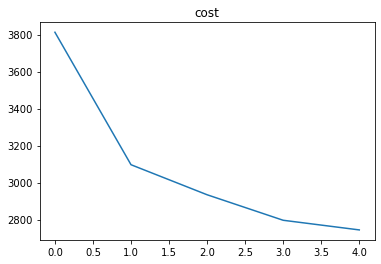

In [12]:
model = TNNI(V,D,K)
model.fit(train_trees)

In [13]:
model.score(test_trees)
# we get a good test accuracy
# probably should have increased the number of epochs

0.827567270730368

In [41]:
# next lets try again recusrsively
# we only need to change the call method to act recusrsively
# performing postorder traversal

# now we are ready to make our model
# we will implement two models
# one that takes advantage of the fact that each node knows its parent
# thus we get an iterative solution
# the other is the recurssive solution
class TNNR(Model): # TNN Recursive
    def __init__(self,V,D,K):
        super(TNNR, self).__init__()
        self.V = V
        self.D = D
        self.K = K
        We = np.random.randn(V, D)/np.sqrt(V+D)
        W1 = np.random.randn(D, D)/np.sqrt(D+D)
        W2 = np.random.randn(D, D)/np.sqrt(D+D)
        Wo = np.random.randn(D, K)/np.sqrt(D+K)
        bo = np.zeros(K)
        bh = np.zeros(D)

        self.We = tf.Variable(We.astype(np.float32))
        self.W1 = tf.Variable(W1.astype(np.float32))
        self.W2 = tf.Variable(W2.astype(np.float32))
        self.Wo = tf.Variable(Wo.astype(np.float32))
        self.bo = tf.Variable(bo.astype(np.float32))
        self.bh = tf.Variable(bh.astype(np.float32))
    
    # takes in lost of roots
    # return accuracy
    def score(self,trees):
        correct = 0
        for tree in trees:
            T = []
            P = []
            self(tree,T,P)
            if T[-1]==np.argmax(P[-1]):
                correct+=1
        return correct/len(trees)

    # takes root and calculate fills logits and targets
    # this is simply postorder traversal
    def call(self,root,targets,logits):
        if root.word != '': # thus a leaf
            h = tf.nn.embedding_lookup(self.We,word2idx[root.word])
        else:
            left_h = self(root.left,targets,logits)
            right_h = self(root.right,targets,logits)
            left_h = tf.experimental.numpy.atleast_2d(left_h)
            right_h = tf.experimental.numpy.atleast_2d(right_h)
            h = self.f(tf.matmul(left_h,self.W1) + tf.matmul(right_h,self.W2) + self.bh)
        
        h = tf.experimental.numpy.atleast_2d(h)
        # get prediction
        logit = tf.matmul(h,self.Wo) + self.bo
        # append to logits and targets
        logits.append(tf.squeeze(logit))
        targets.append(root.label)
        # return h to parent
        return h                        

    def loss(self,T,Y,reg):
        
        if self.train_inner_nodes == True:
            # filter out nodes where sentiment is neural
            T = tf.constant(T,dtype='int32')
            valid = tf.where(T != -1)
            T = tf.gather(T,valid)
            Y = tf.gather(Y,valid)
        else: # we only care about root
            T = T[-1]
            Y = Y[-1]
        cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(T,Y))
        l2 = reg*sum(tf.nn.l2_loss(w) for w in self.weights)
        cost += l2
        return cost
    
    def postorder(self,root,leaves):
        if root.word != '':
            leaves.append(root)
            return
        self.postorder(root.left,leaves)
        self.postorder(root.right,leaves)
    
    # training
    def fit(self,trees,epochs = 5,lr=1e-3,reg = 1e-3,f = tf.nn.tanh,train_inner_nodes=True):
        opt = Adam(lr) 
        self.train_inner_nodes = train_inner_nodes
        self.f = f
        costs = []
        for epoch in range(epochs):
            t0=datetime.now()
            epoch_cost = 0
            correct = 0
            trees = shuffle(trees)
            for i,tree in enumerate(trees):
                with tf.GradientTape() as tape:
                    T = []
                    logits = []
                    self(tree,T,logits)
                    cost = self.loss(T,logits,reg)
                grads = tape.gradient(cost, self.trainable_weights)
                opt.apply_gradients(zip(grads, self.trainable_weights))

                # keep track of epoch cost
                # and number of correct predictions
                epoch_cost += cost.numpy()
                # we only care about root label for accuracy
                correct += T[-1] == np.argmax(logits[-1])
                if (i+1)%100 == 0:
                    print('Epoch: ',epoch+1,'/',epochs,' finished: ',i+1,'/',len(trees))
            print('Finished Epoch:',epoch+1,'/',epochs,' train accuracy: ',correct/len(trees),'epoch cost: ',epoch_cost,' epoch time: ',datetime.now()-t0)
            costs.append(epoch_cost)
        plt.plot(costs)
        plt.title('cost')
        plt.show()

Epoch:  1 / 5  finished:  100 / 6920
Epoch:  1 / 5  finished:  200 / 6920
Epoch:  1 / 5  finished:  300 / 6920
Epoch:  1 / 5  finished:  400 / 6920
Epoch:  1 / 5  finished:  500 / 6920
Epoch:  1 / 5  finished:  600 / 6920
Epoch:  1 / 5  finished:  700 / 6920
Epoch:  1 / 5  finished:  800 / 6920
Epoch:  1 / 5  finished:  900 / 6920
Epoch:  1 / 5  finished:  1000 / 6920
Epoch:  1 / 5  finished:  1100 / 6920
Epoch:  1 / 5  finished:  1200 / 6920
Epoch:  1 / 5  finished:  1300 / 6920
Epoch:  1 / 5  finished:  1400 / 6920
Epoch:  1 / 5  finished:  1500 / 6920
Epoch:  1 / 5  finished:  1600 / 6920
Epoch:  1 / 5  finished:  1700 / 6920
Epoch:  1 / 5  finished:  1800 / 6920
Epoch:  1 / 5  finished:  1900 / 6920
Epoch:  1 / 5  finished:  2000 / 6920
Epoch:  1 / 5  finished:  2100 / 6920
Epoch:  1 / 5  finished:  2200 / 6920
Epoch:  1 / 5  finished:  2300 / 6920
Epoch:  1 / 5  finished:  2400 / 6920
Epoch:  1 / 5  finished:  2500 / 6920
Epoch:  1 / 5  finished:  2600 / 6920
Epoch:  1 / 5  finish

Epoch:  4 / 5  finished:  100 / 6920
Epoch:  4 / 5  finished:  200 / 6920
Epoch:  4 / 5  finished:  300 / 6920
Epoch:  4 / 5  finished:  400 / 6920
Epoch:  4 / 5  finished:  500 / 6920
Epoch:  4 / 5  finished:  600 / 6920
Epoch:  4 / 5  finished:  700 / 6920
Epoch:  4 / 5  finished:  800 / 6920
Epoch:  4 / 5  finished:  900 / 6920
Epoch:  4 / 5  finished:  1000 / 6920
Epoch:  4 / 5  finished:  1100 / 6920
Epoch:  4 / 5  finished:  1200 / 6920
Epoch:  4 / 5  finished:  1300 / 6920
Epoch:  4 / 5  finished:  1400 / 6920
Epoch:  4 / 5  finished:  1500 / 6920
Epoch:  4 / 5  finished:  1600 / 6920
Epoch:  4 / 5  finished:  1700 / 6920
Epoch:  4 / 5  finished:  1800 / 6920
Epoch:  4 / 5  finished:  1900 / 6920
Epoch:  4 / 5  finished:  2000 / 6920
Epoch:  4 / 5  finished:  2100 / 6920
Epoch:  4 / 5  finished:  2200 / 6920
Epoch:  4 / 5  finished:  2300 / 6920
Epoch:  4 / 5  finished:  2400 / 6920
Epoch:  4 / 5  finished:  2500 / 6920
Epoch:  4 / 5  finished:  2600 / 6920
Epoch:  4 / 5  finish

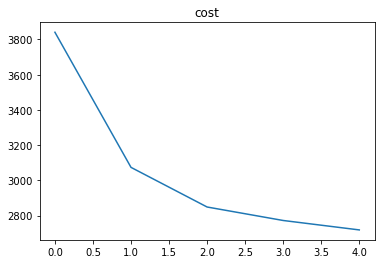

In [42]:
model = TNNR(V,D,K)
model.fit(train_trees)

In [43]:
model.score(test_trees)
# so we get about the same test accuracy
# as we can see time is on par with iterative solution
# thanks to eager execution , also our trees are not that big
# a quick note is that the model appears to be overfitting
# further training causes train accuracy to increase while test accuracy drops/stays the same
# we can see how the model here scores 2% less than the above model when they are the same
# but these results are satisfactory (actually I am just being lazy :) )

0.7984623833058759

<h1>Math</h1>

Now we are going to look at how we can transform our Recursive neural networks into a Recurrent neural networks

---

<h3>ecursive NNs to Recurrent NNs</h3>

lets start by thinking what are TNNs for and what are RNNs for

well , TNNs are for trees and RNNs are for sequences

so the way that we are going to convert our problem from a TNN to an RNN is to convert our parse trees into sequences

How can we do this ?

---

<h3>Algorithms</h3>

One simple way of turning a tree into an array is to arrange the array elements in such a way that all the children appear to the left of its parent and the value of each element can be its parent index 

we will call this the parents array

notice that we have used the NULL value -1 for nodes that dont have parents

only the root should not have a parent

<img src='extras/33.18.PNG' width='600'></img>

---

<h3>Post-Order Traversal</h3>

So what is the algorithm that allows us to construct trees in this way ?

We know that a parent has to come after its children , in algorithms terminology, this is called post-order traversal

It means we visit the left node first, then the right node then the current node , and we do this recusrsively

---

<h3>Relations</h3>

For our specific dataset, we want to know how a child is related to its parent 

so it can have a relation defined by the parse tree, or the relation can be a simple left/right that we have in the binary tree case

<img src='extras/33.19.PNG' width='550'></img>

So we can see that the structure will work for binary trees, or trees with any number of children

notice that again we used the null value of -1 in the case that there are no relations

---

<h3>Word indexes</h3>

Finally, we want to know what word stored at a node if any

<img src='extras/33.20.PNG' width='500'></img>

so we need to stor anothe list, the same length as the others that stores either the word index, if its a leaf node, or -1 if its not a leaf word

---

<h3>Summary</h3>

So to summarise then we need 3 seperate arrays to store a tree

<ul>
    <li>The parents array, which tells us where to find the parent of a node</li>
    <li>The relations array, which tells use how a child is related to its parent</li>
    <li>The words array, which tells us if the node has a word associated with it and what the word index is</li>
</ul>

To create these arrays, we need to make sure that a parent always comes after its children, which requires us to use post-order traversal

---

<h3>How to write a better TNN</h3>

Now that we know how to turn a tree into a set of lists, lets discuss how we would runn this through a recurrent neural network

this is slightly complicated than what we did with RNNs since now we have 3 arrays instead of 1, so what do we do with them ?

The idea is we want to keep a running list of all the tree nodes values and then update these values as we go through the arrays

We can go through each element of each array 1 by 1

so for example, we will look at parents[0],relations[0],words[0] at the same time, then we will look at parents[1],relations[1],words[1] at the same time

Why is this ok ?

Because everything we need to determine a node's value depends only on its children

Because its children are allways to the left of its parent in the array we are certain that we have calcualted these values first

---

<h3>Recurrence</h3>

So what should we do in the recurrence function

two things

the first thing is lets calculated the value at the current node n

if its a word, then its jsut the word vector of that word

if its not a word, then its just f of its current value 

but why does node n have all the right stuff it needs by the time we reach it ? (so we only apply activation)

well, its because the second thing we do is feed the current value into its parent

so whether the current node is a word or an inner node it doesnot matter, the way it feeds its value into its parent is the same

its just its own times $W_h$ for its child-parent relation added to whatever value is currently at the parent

if the node is the root, it doesnot have a parent so we do nothing here

in case thats not clear, we now have a 4th list that stores the value needed by each node, each node supplies its parent by the needed value, when we reach the parent we have everyting we need

if the node is lead, then it gets the word embedding , does the multiplication and adds this to parent index

when we reach a parent , we have everything we need, the parent gets its value by applying the activation (then we can get the label)

the node does two things with its own value,

multiply by $W_o$ to get its output prediction 

multiply by $W_h$ (according to parent-child relation) and supply its parent with this value

and this continues till we reach the root

<h1>Math</h1>

Now, we are going to extend the Recursive Neural Network to get an even more expressive Recursive Neural Tensor Network

A very fancy name, but as we will see its a very simple concept

note that everything that follows withing this section assumes we are working with binary trees

---

<h3>Recursice Neural Network</h3>

So we already know how a Recursive NN is built

let look at an alternative view of the TNN, since that was how it was represented in the paper that first introduced this model

to get the inner node value, we concatenate the values from the left and right child, call this x

$$\text{x = concat}(x_{\text{left}},x_{\text{right}})$$

then the value at this node is just

$$h = f(W^Tx+b)$$

note that this requires $W$ to be of size 2DxD, because all the inner node values must be of size D and after concatenation $x$ is of size 2D

we still have the same number of parameters as before, because before we had $W_\text{left}$ and $W_\text{right}$ which were both of size DxD

---

<h3>Extend this model</h3>

So whats a natural way to extend this model ?

well we can add a quadratic term

$$h_j = f(x^TA_jx + W_j^Tx + b_j)$$

So $A$ is the quadratic parameter

Now what should the size of $A$ be ?

notice we have onyl shown one component of $h$ here

its written such that each term is a scalar since its difficult to represent tensor multiplication in terms of matricies

in order for the quadratic term to be a valid multiplication, $A_j$ needs to be a matrix of size 2Dx2D since $x$ is of size 2D

Since there are D components of $h$, so that $j$ goes from 1 to $D$, that means $A$ is of size $D \times 2D \times 2D$

---

<h3>Quadratic Discriminant Analysis</h3>

The functional form should remind us a lot of something we have seen in the past

In particular, when studying logistic regression, we looked at the closed form solution for logistic regression which we could find if both classes had a gaussian distribution using Bayes rule

remember that if both gaussian distribution had the same covariance, then the seperating hypersurface is linear

this is also called linear discriminant analysis

$$h(x) = W^T x + b$$

if they had a different covariance, then the hypersurface was quadratic, since the covariance terms did not cancel out

$$h(x) = x^TAx + B^Tx + c$$

---

<h3>Another perspective</h3>

What another way to think about this ?

well, if we break down the individual components of $x$, and lets say $D=2$,then we have

<ul>
    <li>$x_{left_1}$</li>
    <li>$x_{left_2}$</li>
    <li>$x_{right_1}$</li>
    <li>$x_{right_2}$</li>
</ul>

well the result is , we are now getting temrs like

<ul>
    <li>$param \times x_{left_1} \times x_{right_2}$</li>
    <li>$param \times x_{left_1} \times x_{left_2}$</li>
</ul>

we call these interaction terms

---

<h3>Implementation</h3>

Now how do we implement this

Rather than concatenate the left child value and the right child value we are going to leave them seperate and implement an equivalent formulation

Hopefully this helps us more easily picture what is happening

so lets start again with the plain Recursive neural network

$$h(x_L,x_R) = f(W_L^TX_L + W_R^Tx_R + b)$$

We can extend this by adding 3 quadratic terms

$$h(x_L,x_R) = f(x_L^T A_{LL}x_L + x_L^TA_{LR}x_R + x_R^TA_{RR}x_R + W_L^Tx_L + W_R^Tx_R + b)$$

of course, each $A$ must be of size $D \times D \times D$

how many weights is that in total ?

$3 D^3$, which is not the same as the original formulation which had $D \times 2D \times 2D = 4D^3$ terms

The question we want to ask ourselves is are we missing any interaction terms here ?

Which ones are redundant ?

(of course the redundant is $A_{RL}$ since $A_{LR}$ already captures the interaction between left and right children)

---

<h3>RNTN Iplementation</h3>

So lets talk about how we are going to implement this

The only part that is different is that we are going to represent our trees as a different set of lists

in particular, we will get rid of the notion of relations and parents

instead we will have 3 lists called : words,left_children,right_children

as the name suggest, the word list will contain the word index if that word is a node. otherwwise it will be -1 as usual

left_children will contain the index of the left child, if the node has a left child, and the same goes for the right

note that any node with a left child will also have a right child since all nodes have either 0 or 2 children

now why are we doing this ?

recall that in our previous formulation, when we calculated the value at the current node, we would feed its value into the parent

but now, we need to not only multiply the current node by a weight but we need to multiply it by its sibiling node values as well, which we currently dont have access to

so using lists for left children and right children makes this easier

<h1>code</h1>

In [23]:
# now we will attempt converting the TNN to an RNN + apply RNTN (quadratic)
# the advantage of the RNN (sequence) approach would be that we will be able to train in batches
# also, we can apply padding, in this way the input can be a tensor of constant size
# and so we will be able to use @tf.function
# hopefully all this speeds up the training significantly

In [24]:
# first load the data as in the previous script

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.utils import shuffle
from datetime import datetime

In [25]:
# lets define a class of tree nodes
class node:
    def __init__(self):
        self.right = None
        self.left = None
        self.label = None 
        self.word = ''
        # eases parsing
        self.parent = None

In [26]:
# next lets load in the data
train_trees_text = []
for line in open('datasets/trees/train.txt'):
    train_trees_text.append(line.rstrip())
    
test_trees_text = []
for line in open('datasets/trees/test.txt'):
    test_trees_text.append(line.rstrip())

In [27]:
# lets create a function to parse teext to a tree
def create_tree(text):    
    # first create root node
    root = node()
    # we also want to keep track of the words we saw
    words = []
    for i,w in enumerate(text):
        if w == ' ':
            continue

        if w == '(':
            # so we need to create a new node
            child = node()
            if root.left is None:
                root.left = child
            else:
                root.right = child
            child.parent = root
            # then let l_child continue
            root = child

        elif w != ')':
            # we have a label or a word
            # lets peak ahead to see if the next symbol is a character or a ' '
            if text[i+1] == ' ': 
                # so we have a label
                root.label = int(w)
            else:
                # so its a character of the word
                root.word += w.lower()
        else : # w is )
            if root.word != '':
                words.append(root.word)
            root = root.parent

    # our root is actually the left child of the root
    root = root.left
    return root,words

In [28]:
# now lets convert text to trees
vocab = []
train_trees = []
for text in train_trees_text:
    tree,words = create_tree(text)
    train_trees.append(tree)
    vocab += words

test_trees = []
# now again for test data
for text in test_trees_text:
    tree,words = create_tree(text)
    test_trees.append(tree)
    vocab += words
    
vocab = list(set(vocab))
V = len(vocab)

# lets also create word2idx dict
word2idx = {k:v for k,v in zip(vocab,range(V))}

In [29]:
K = 5
D = 10
is_binary = True # whether or not to do binary classification

# we will change our problem to binary classification
# so rating 0,1 become negative sentiment : 0
# 2 is neutral sentiment : -1 , these will be filtered out 
# 3,4 become positive sentiment : 1

def to_binary(tree):
    if tree == None:
        return
    if tree.label<2:
        tree.label = 0
    elif tree.label == 2:
        tree.label = -1
    else:
        tree.label = 1
    to_binary(tree.left)
    to_binary(tree.right)
    return tree
    
if is_binary:
    K = 2
    for tree in train_trees:
        to_binary(tree)
    for tree in test_trees:
        to_binary(tree)

In [30]:
# filter out trees whose label (that of root) is neutral (2 --> -1)

train_trees = [tree for tree in train_trees if tree.label != -1]
test_trees = [tree for tree in test_trees if tree.label != -1]

In [31]:
# so far so good, everything is as before
# now what will be the format of our data ?
# our data will be of size NxTxB
# N is the number of our trees
# T is the number of nodes is a tree 
# of course since not all trees are of same length, we apply padding
# also nodes are arranged in an order such that a parent always is to the right of its children
# B is the branching factor + 1, that is the number of children +1
# so each node t in T knows its two children
# and if a node is a word we need to know the index of that node , so thats where the one comes from
# if a node has no children , then thats -1
# if a node is not a word thats also -1
# traversing the tree in post order is essential here
# So X is of shape NxTxD
# Y will be of shape NxT

In [32]:
def process(tree):
    X = []
    Y = []
    def tree_to_list(tree,i,X,Y):
        # so each node needs three things
        # [word_idx,left,right]
        if tree == None:
            return -1
        word_i = None
        left_i = None
        right_i = None
        if tree.word != '':
            word_i = word2idx[tree.word]
        else: # not a word so -1
            word_i = -1

        # now post order traversal
        left_i = tree_to_list(tree.left,i,X,Y)
        right_i = tree_to_list(tree.right,left_i,X,Y)
        
        if right_i == -1:
            my_i = i+1
        else:
            my_i = right_i + 1

        me = [word_i,left_i,right_i]
        X.append(me)
        Y.append(tree.label)
        return my_i
    
    tree_to_list(tree,-1,X,Y)
    return X,Y

In [33]:
# next we need to pad our sequences so we can form a matrix
# for padding we use [-2,-2,-2]
# we also want to r
def generate_data(trees):
    X = []
    Y = []

    for tree in trees:
        x,y = process(tree)
        X.append(x)
        Y.append(y)

    max_seq_length = max(len(y) for y in Y)

    for x in X:
        padd = max_seq_length - len(x)
        for i in range(padd):
            x.append([-2,0,0])

    for y in Y:
        padd = max_seq_length - len(y)
        for i in range(padd):
            y.append(-2)
    X = np.stack(X)
    Y = np.stack(Y)
    return X,Y

In [34]:
Xtrain,Ytrain = generate_data(train_trees)
Xtest,Ytest = generate_data(test_trees)

In [35]:
# lets check the shapes
print('Xtrain: ',Xtrain.shape,' Ytrain: ',Ytrain.shape)
print('Xtest: ',Xtest.shape,' Ytest: ',Ytest.shape)

Xtrain:  (6920, 103, 3)  Ytrain:  (6920, 103)
Xtest:  (1821, 111, 3)  Ytest:  (1821, 111)


In [36]:
# so our data is in the correct shape
# now we are ready to make our model

In [40]:
# increasing batch size had a negative effect on training
# so we train stochastically
# but we still can make use of the @tf.function
class RNTN(Model): 
    def __init__(self,V,D,K):
        super(RNTN, self).__init__()
        self.V = V
        self.D = D
        self.K = K
        We = np.random.randn(V, D)/np.sqrt(V+D)
        A_LL = np.random.randn(D, D, D)/np.sqrt(3*D)
        A_LR = np.random.randn(D, D, D)/np.sqrt(3*D)
        A_RR = np.random.randn(D, D, D)/np.sqrt(3*D)
        W_L = np.random.randn(D, D)/np.sqrt(2*D)
        W_R = np.random.randn(D, D)/np.sqrt(2*D)
        Wo = np.random.randn(D, K)/np.sqrt(D+K)
        bo = np.zeros(K)
        bh = np.zeros(D)

        self.We = tf.Variable(We.astype(np.float32))
        self.A_LL = tf.Variable(A_LL.astype(np.float32))
        self.A_LR = tf.Variable(A_LR.astype(np.float32))
        self.A_RR = tf.Variable(A_RR.astype(np.float32))
        self.W_L = tf.Variable(W_L.astype(np.float32))
        self.W_R = tf.Variable(W_R.astype(np.float32))
        self.Wo = tf.Variable(Wo.astype(np.float32))
        self.bo = tf.Variable(bo.astype(np.float32))
        self.bh = tf.Variable(bh.astype(np.float32))
    
    # takes in lost of roots
    # return accuracy
    def score(self,X,Y):
        correct = 0
        _,T = Y.shape
        for x,y in zip(X,Y):
            logits = self(x)
            idx = np.where(y == -2)[0]
            if idx.size == 0:
                root_idx = T-1
            else:
                root_idx = int(idx[0]-1)
            correct += y[root_idx] == np.argmax(logits[root_idx])
            
        return correct/len(X)
    
    @tf.function
    def call(self, tree):
        T = tree.shape[0]
        hiddens = tf.TensorArray(tf.float32, size = T)
        logits = tf.TensorArray(tf.float32, size = T) 
        
        
        for i in tf.range(T):
            node = tree[i]
            if node[0] == -2 : # padding
                break
            
            if node[0] >= 0 : # leaf
                wordvec = self.We[node[0]] # D
                wordvec = tf.expand_dims(wordvec,axis=0) # 1xD
                # add two hiddens
                hiddens = hiddens.write(i,wordvec)
                # get logits
                logit = tf.matmul(wordvec,self.Wo) + self.bo
                logits = logits.write(i,tf.squeeze(logit))

                
            if node[0] == -1 : # parent (inner node)
                left_h = hiddens.read(node[1])
                right_h = hiddens.read(node[2])
                
                # get hidden vector
                
                LL = tf.matmul(tf.matmul(left_h,self.A_LL),tf.transpose(left_h))
                LL = tf.reshape(LL,(1,D))
                
                LR = tf.matmul(tf.matmul(left_h,self.A_LR),tf.transpose(right_h))
                LR = tf.reshape(LR,(1,D))

                RR = tf.matmul(tf.matmul(right_h,self.A_RR),tf.transpose(right_h))
                RR = tf.reshape(RR,(1,D))
                
                L = tf.matmul(left_h,self.W_L)
                
                R = tf.matmul(right_h,self.W_R)
                
                h = self.f(LL + LR + RR + L + R + self.bh)
                
                hiddens = hiddens.write(i,h)
                
                # logits
                logit = tf.matmul(h,self.Wo) + self.bo
                logits = logits.write(i,tf.squeeze(logit))

        return logits.stack()
            
    def loss(self,T,Y,reg):    
        T = tf.cast(T,dtype='int32')
        if self.train_inner_nodes == True:
            # filter out nodes where sentiment is neural
            # so we remove -1 : which are neutral and -2 which are paddings
            valid = tf.where(T >= 0)
            T = tf.gather(T,valid)
            Y = tf.gather(Y,valid)
        else: # we only care about root
            
            idx = tf.squeeze(tf.where(T == -2))
            if len(idx) == 0:
                root_idx = len(T)-1
            else:
                root_idx = int(idx[0]-1)
            
            T = T[root_idx]
            Y = Y[root_idx]
        cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(T,Y))
        l2 = reg*sum(tf.nn.l2_loss(w) for w in self.weights)
        cost += l2
        return cost
        
    # training
    def fit(self,X,Y,epochs = 5,lr=1e-3,reg = 1e-3,f = tf.nn.tanh,train_inner_nodes=True):
        opt = Adam(lr) 
        self.train_inner_nodes = train_inner_nodes
        self.f = f
        costs = []
        T = X.shape[1]
        for epoch in range(epochs):
            t0=datetime.now()
            epoch_cost = 0
            correct = 0
            X,Y = shuffle(X,Y)
            for i,(x,y) in enumerate(zip(X,Y)):
                with tf.GradientTape() as tape:
                    logits = self(x)
                    cost = self.loss(y,logits,reg)
                grads = tape.gradient(cost, self.trainable_weights)
                opt.apply_gradients(zip(grads, self.trainable_weights))

                # keep track of epoch cost
                # and number of correct predictions
                epoch_cost += cost.numpy()
                # we only care about root label for accuracy
                idx = np.where(y == -2)[0]
                if idx.size == 0:
                    root_idx = T-1
                else:
                    root_idx = int(idx[0]-1)
                correct += y[root_idx] == np.argmax(logits[root_idx])
                if (i+1)%100 == 0:
                    print('Epoch: ',epoch+1,'/',epochs,' finished: ',i+1,'/',len(X))
            print('Finished Epoch:',epoch+1,'/',epochs,' train accuracy: ',correct/len(X),'epoch cost: ',epoch_cost,' epoch time: ',datetime.now()-t0)
            costs.append(epoch_cost)
        plt.plot(costs)
        plt.title('cost')
        plt.show()

In [41]:
model = RNTN(V,D,K)

Epoch:  1 / 5  finished:  100 / 6920
Epoch:  1 / 5  finished:  200 / 6920
Epoch:  1 / 5  finished:  300 / 6920
Epoch:  1 / 5  finished:  400 / 6920
Epoch:  1 / 5  finished:  500 / 6920
Epoch:  1 / 5  finished:  600 / 6920
Epoch:  1 / 5  finished:  700 / 6920
Epoch:  1 / 5  finished:  800 / 6920
Epoch:  1 / 5  finished:  900 / 6920
Epoch:  1 / 5  finished:  1000 / 6920
Epoch:  1 / 5  finished:  1100 / 6920
Epoch:  1 / 5  finished:  1200 / 6920
Epoch:  1 / 5  finished:  1300 / 6920
Epoch:  1 / 5  finished:  1400 / 6920
Epoch:  1 / 5  finished:  1500 / 6920
Epoch:  1 / 5  finished:  1600 / 6920
Epoch:  1 / 5  finished:  1700 / 6920
Epoch:  1 / 5  finished:  1800 / 6920
Epoch:  1 / 5  finished:  1900 / 6920
Epoch:  1 / 5  finished:  2000 / 6920
Epoch:  1 / 5  finished:  2100 / 6920
Epoch:  1 / 5  finished:  2200 / 6920
Epoch:  1 / 5  finished:  2300 / 6920
Epoch:  1 / 5  finished:  2400 / 6920
Epoch:  1 / 5  finished:  2500 / 6920
Epoch:  1 / 5  finished:  2600 / 6920
Epoch:  1 / 5  finish

Epoch:  4 / 5  finished:  100 / 6920
Epoch:  4 / 5  finished:  200 / 6920
Epoch:  4 / 5  finished:  300 / 6920
Epoch:  4 / 5  finished:  400 / 6920
Epoch:  4 / 5  finished:  500 / 6920
Epoch:  4 / 5  finished:  600 / 6920
Epoch:  4 / 5  finished:  700 / 6920
Epoch:  4 / 5  finished:  800 / 6920
Epoch:  4 / 5  finished:  900 / 6920
Epoch:  4 / 5  finished:  1000 / 6920
Epoch:  4 / 5  finished:  1100 / 6920
Epoch:  4 / 5  finished:  1200 / 6920
Epoch:  4 / 5  finished:  1300 / 6920
Epoch:  4 / 5  finished:  1400 / 6920
Epoch:  4 / 5  finished:  1500 / 6920
Epoch:  4 / 5  finished:  1600 / 6920
Epoch:  4 / 5  finished:  1700 / 6920
Epoch:  4 / 5  finished:  1800 / 6920
Epoch:  4 / 5  finished:  1900 / 6920
Epoch:  4 / 5  finished:  2000 / 6920
Epoch:  4 / 5  finished:  2100 / 6920
Epoch:  4 / 5  finished:  2200 / 6920
Epoch:  4 / 5  finished:  2300 / 6920
Epoch:  4 / 5  finished:  2400 / 6920
Epoch:  4 / 5  finished:  2500 / 6920
Epoch:  4 / 5  finished:  2600 / 6920
Epoch:  4 / 5  finish

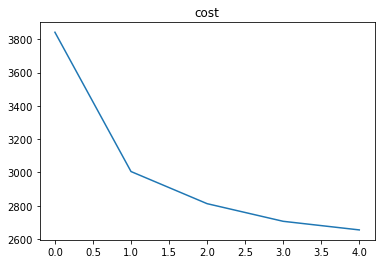

In [42]:
model.fit(Xtrain,Ytrain)

In [43]:
model.score(Xtest,Ytest)

0.828665568369028

In [1]:
# we can see now that with tf.function
# the quadratic model runs in half the time of the previous linear model !
# notes for future me : more epochs + lr scheduling 
# future me : done , 5 epochs at 1e-3 , next 5 at 1e-4
# high train accuracy (93.5% ) , model still overfits (83.6% test)
# future future me : fix ocerfitting + try with train_inner_nodes = False